In [63]:
import warnings
warnings.filterwarnings("ignore")

# EDA helpers
import missingno as msno
import imblearn
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


print("All libraries loaded successfully!")


All libraries loaded successfully!


In [49]:
# CP70066E – Diabetes Outcome Prediction
## We will do the below in order to achieve the Project Rubric

## 1. Intro & Dataset
## 2. EDA (Univariate → Bivariate → Correlations → Missingness)
## 3. Data Preparation (Duplicates, Missing, Outliers, Imbalance)
## 4. Feature Engineering & Selection (Encoding, Binning, Variance/Chi²)
## 5. Train / Validate / Test (Models, Tuning, Metrics)
## 6. Results & Discussion (Tables, Confusion Matrices)
## 7. Ethical Analysis – notes (full 800 words in reports)
## 8. Executive Summary – notes (full 500–700 words in reports)
## 9. Appendix (helpers)


In [50]:
## 1. Intro & Dataset

##This project predicts whether a patient is likely to develop diabetes (`Outcome` = 1) or not (`Outcome` = 0) using diagnostic health data.  
##The dataset is provided on Blackboard for the CP70066E Machine Learning module and extends the classic *Pima Indians Diabetes* dataset with additional features like **PhysicalActivityLevel** and **FamilyHistory**.

##We will:
##1. Explore and understand the dataset (EDA)  
##2. Clean and prepare the data  
##3. Engineer and select meaningful features  
##4. Build ML models (Logistic Regression, Decision Tree, SVM)  
##5. Evaluate and compare model performance  
##6. Reflect on ethical implications and fairness

    
# Path to your dataset
DATA_PATH = "../data/diabetes_extended_noisy.csv"

# Load dataset
df = pd.read_csv(DATA_PATH)

# Quick look
df.shape, df.columns.to_list()[:20]


((798, 11),
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age',
  'Outcome',
  'PhysicalActivityLevel',
  'FamilyHistory'])

In [51]:
# Preview first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel,FamilyHistory
0,2,90.0,60,0.0,0.0,23.5,0.191,25,0,2,NaN
1,1,112.0,80,45.0,132.0,34.8,0.217,24,0,2,NaN
2,2,141.0,58,34.0,128.0,25.4,0.699,24,0,2,Moderate
3,6,91.0,0,0.0,0.0,29.8,0.501,31,0,1,Moderate
4,0,109.0,88,30.0,0.0,32.5,0.855,38,1,2,Strong


In [52]:
# Check data types and missing values
df.info()

# Quick descriptive statistics
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               798 non-null    int64  
 1   Glucose                   798 non-null    float64
 2   BloodPressure             798 non-null    int64  
 3   SkinThickness             782 non-null    float64
 4   Insulin                   782 non-null    float64
 5   BMI                       782 non-null    float64
 6   DiabetesPedigreeFunction  798 non-null    float64
 7   Age                       798 non-null    int64  
 8   Outcome                   798 non-null    int64  
 9   PhysicalActivityLevel     798 non-null    int64  
 10  FamilyHistory             366 non-null    object 
dtypes: float64(5), int64(5), object(1)
memory usage: 68.7+ KB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,798.0,3.864662,3.364025,0.000,1.00000,3.000,6.000,17.00000
Glucose,798.0,121.880202,38.268527,0.000,99.00000,116.500,140.000,530.84399
BloodPressure,798.0,69.002506,19.410833,0.000,62.00000,72.000,80.000,122.00000
SkinThickness,782.0,20.524297,15.855907,0.000,0.00000,23.000,32.000,99.00000
Insulin,782.0,78.827366,113.574851,0.000,0.00000,27.000,126.000,846.00000
BMI,782.0,32.014066,7.761333,0.000,27.40000,32.000,36.500,67.10000
DiabetesPedigreeFunction,798.0,0.467976,0.329564,0.078,0.23825,0.365,0.618,2.42000
Age,798.0,33.325815,11.776531,21.000,24.00000,29.000,41.000,81.00000
Outcome,798.0,0.344612,0.475539,0.000,0.00000,0.000,1.000,1.00000
PhysicalActivityLevel,798.0,1.651629,0.519570,1.000,1.00000,2.000,2.000,3.00000


In [53]:
##print the few tail rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel,FamilyHistory
793,5,139.0,64,35.0,140.0,28.6,0.411,26,0,2,Moderate
794,1,96.0,122,0.0,0.0,22.4,0.207,27,0,3,NaN
795,10,101.0,86,37.0,0.0,45.6,1.136,38,1,2,Strong
796,0,141.0,0,0.0,0.0,42.4,0.205,29,1,1,NaN
797,0,125.0,96,0.0,0.0,22.5,0.262,21,0,2,NaN


In [54]:
# **Quick Observations / Summary for 
## 1. Intro & Dataset :**

#- Dataset shape: (rows × columns)  
#- Columns: list main features (e.g., Pregnancies, Glucose, BloodPressure, BMI, Age, PhysicalActivityLevel, FamilyHistory, Outcome)  
#- Outcome variable is binary (0 = no diabetes, 1 = diabetes)  
#- Some columns may contain missing or zero values (to be handled later)


In [55]:
## 2. EDA (Univariate → Bivariate → Correlations → Missingness)
## 2A | Load and quick overview
# reload the dataset with correct path
df = pd.read_csv("../data/diabetes_extended_noisy.csv")

print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns.to_list())
df.head()


Dataset shape: (798, 11)

Columns:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'PhysicalActivityLevel', 'FamilyHistory']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel,FamilyHistory
0,2,90.0,60,0.0,0.0,23.5,0.191,25,0,2,NaN
1,1,112.0,80,45.0,132.0,34.8,0.217,24,0,2,NaN
2,2,141.0,58,34.0,128.0,25.4,0.699,24,0,2,Moderate
3,6,91.0,0,0.0,0.0,29.8,0.501,31,0,1,Moderate
4,0,109.0,88,30.0,0.0,32.5,0.855,38,1,2,Strong


In [56]:
# describe numeric features
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,798.0,3.864662,3.364025,0.000,1.00000,3.000,6.000,17.00000
Glucose,798.0,121.880202,38.268527,0.000,99.00000,116.500,140.000,530.84399
BloodPressure,798.0,69.002506,19.410833,0.000,62.00000,72.000,80.000,122.00000
SkinThickness,782.0,20.524297,15.855907,0.000,0.00000,23.000,32.000,99.00000
Insulin,782.0,78.827366,113.574851,0.000,0.00000,27.000,126.000,846.00000
BMI,782.0,32.014066,7.761333,0.000,27.40000,32.000,36.500,67.10000
DiabetesPedigreeFunction,798.0,0.467976,0.329564,0.078,0.23825,0.365,0.618,2.42000
Age,798.0,33.325815,11.776531,21.000,24.00000,29.000,41.000,81.00000
Outcome,798.0,0.344612,0.475539,0.000,0.00000,0.000,1.000,1.00000
PhysicalActivityLevel,798.0,1.651629,0.519570,1.000,1.00000,2.000,2.000,3.00000


In [57]:
# **Observation:**
# - Some minimum values are zeros for features like Glucose, BloodPressure, SkinThickness, Insulin — these may represent missing values.
# - Continuous variables (e.g., Glucose, BMI, Age) show moderate variation.

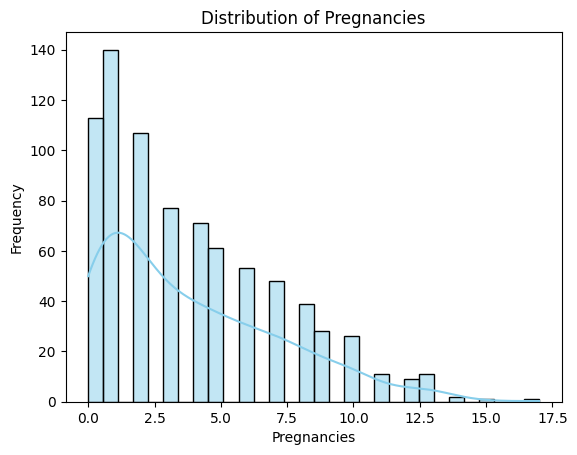

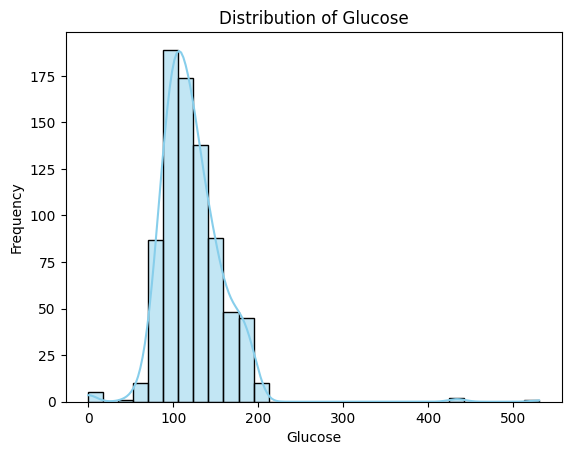

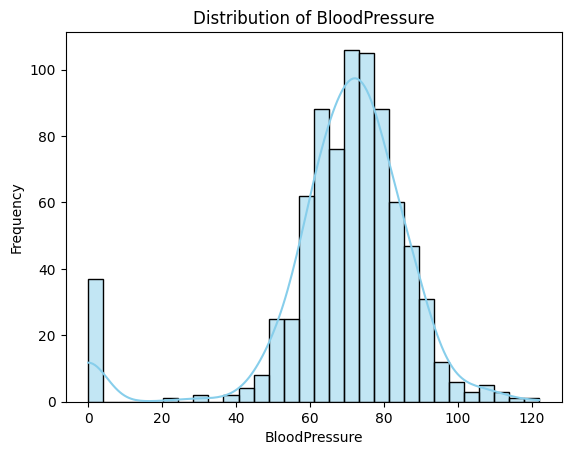

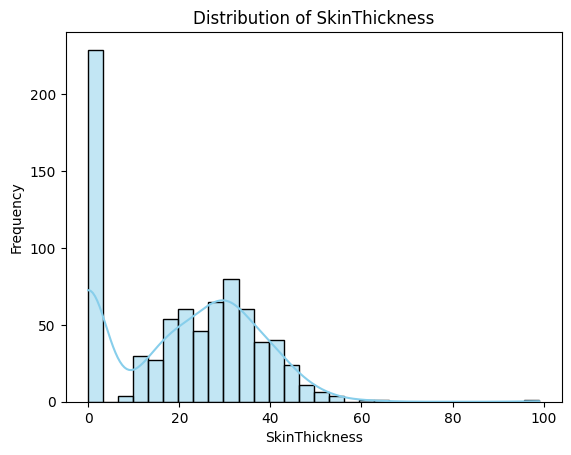

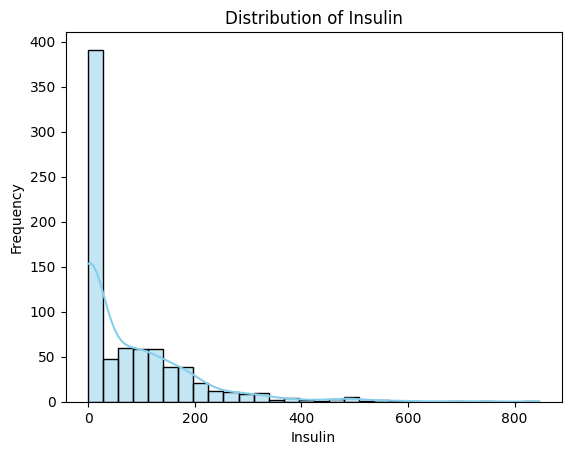

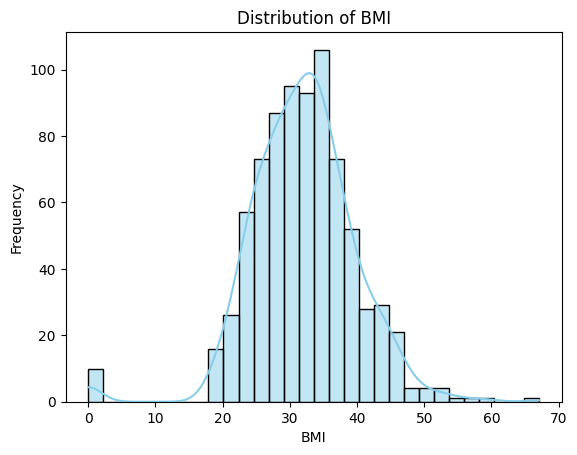

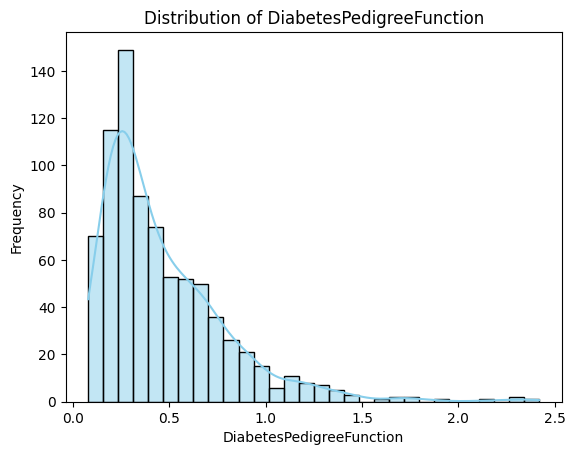

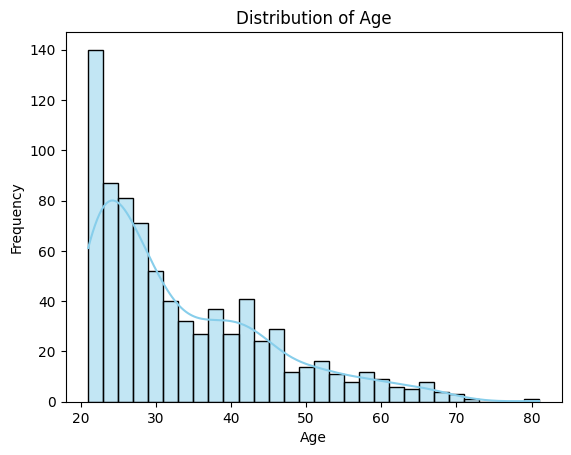

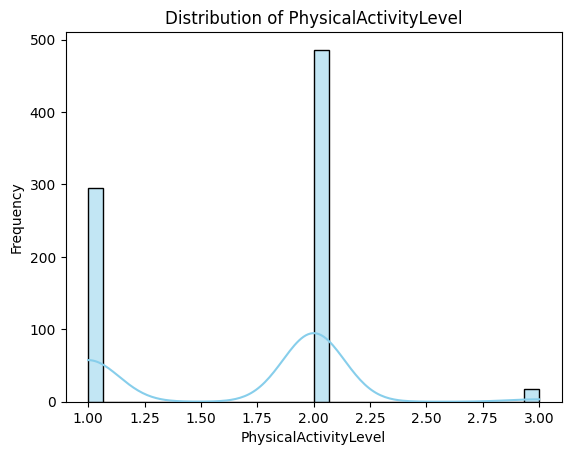

In [58]:
# 2C | Univariate analysis for numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop(['Outcome'])
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [59]:
# **Observation:**
# Most numeric variables are roughly right-skewed; zeros appear frequently in health-measure columns.

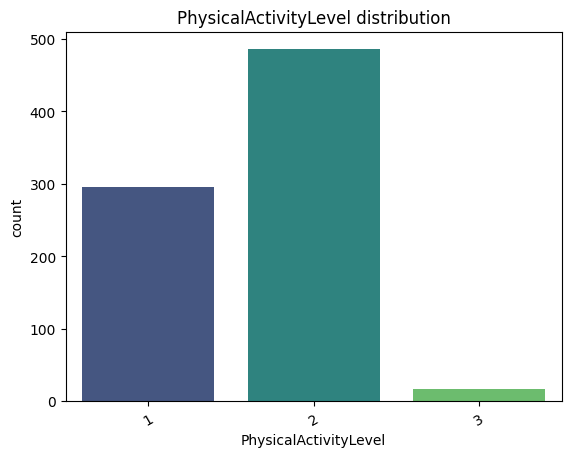

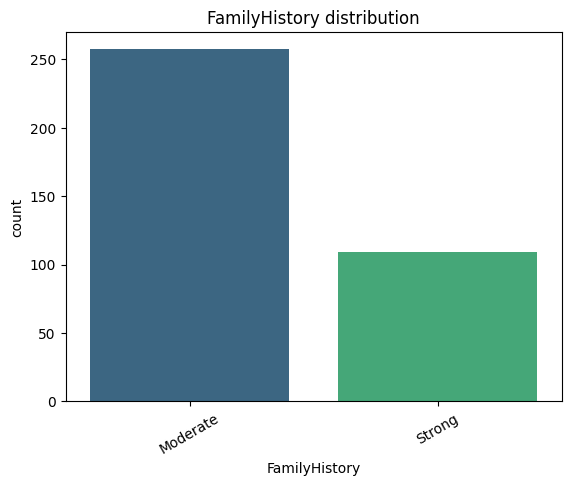

In [64]:
# 2D | Univariate for categorical columns

cat_cols = ['PhysicalActivityLevel', 'FamilyHistory']

for col in cat_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue=None, palette="viridis", legend=False)
    plt.title(f"{col} distribution")
    plt.xticks(rotation=30)
    plt.show()



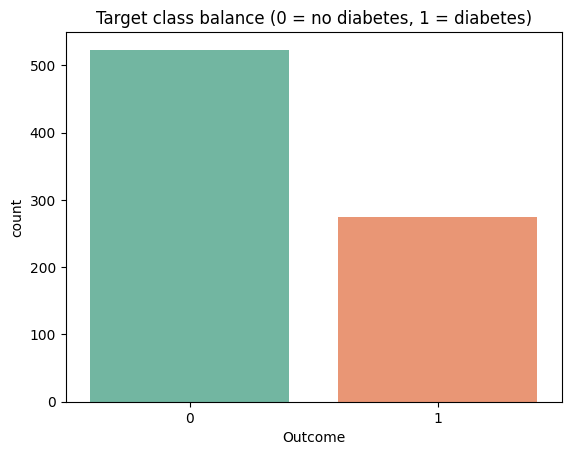

Outcome
0    65.54
1    34.46
Name: proportion, dtype: float64

In [66]:
# 2E | Target variable balance
sns.countplot(x='Outcome', data=df, palette="Set2")
plt.title("Target class balance (0 = no diabetes, 1 = diabetes)")
plt.show()

df['Outcome'].value_counts(normalize=True).mul(100).round(2)


In [ ]:
# **Observation:**  
# If one class dominates (> 60 %), note possible imbalance — we may later use SMOTE to correct it.

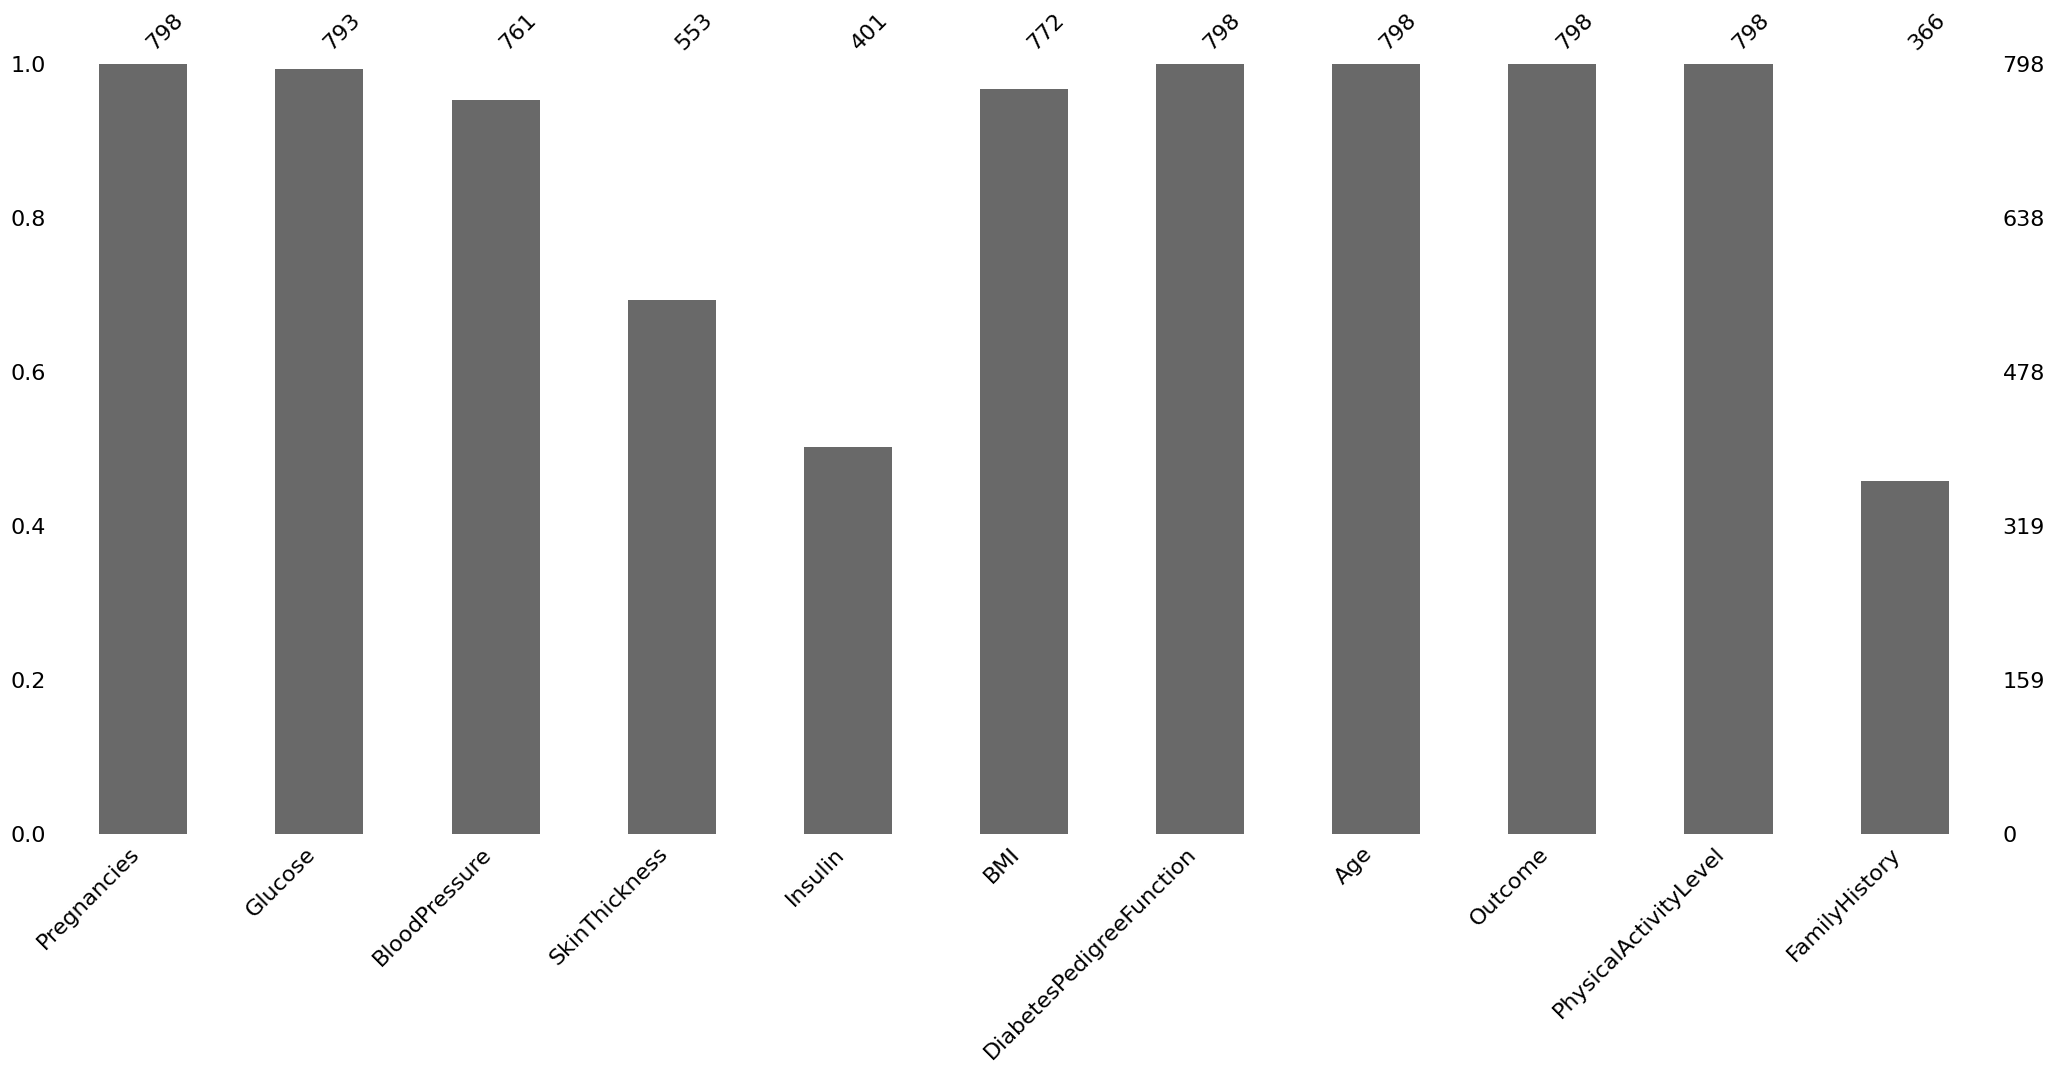

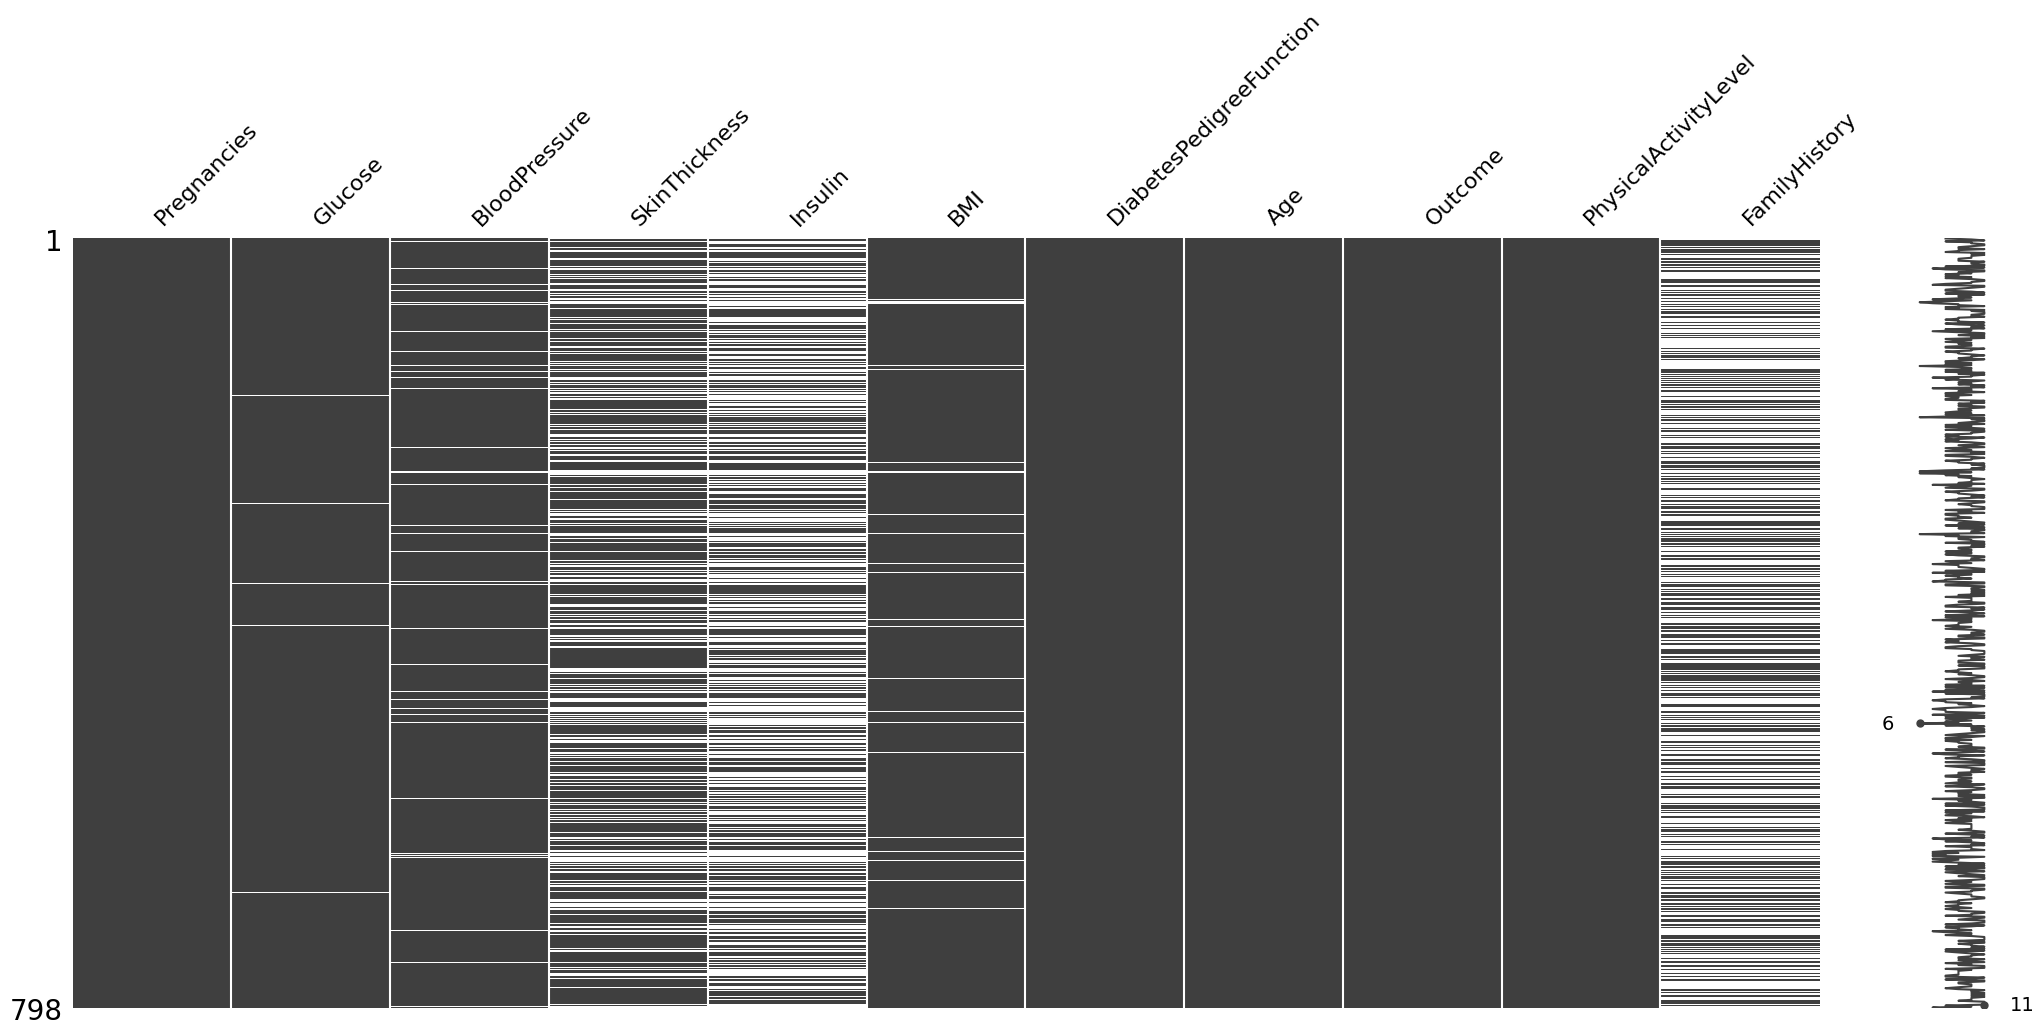

FamilyHistory               432
Insulin                     397
SkinThickness               245
BloodPressure                37
BMI                          26
Glucose                       5
Pregnancies                   0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
PhysicalActivityLevel         0
dtype: int64

In [68]:
# 2F | Missing-data visualization
# convert obvious 0s to NaN for medical features that can't be zero
cols_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# visualize missingness
msno.bar(df)
plt.show()

msno.matrix(df)
plt.show()

df.isna().sum().sort_values(ascending=False)


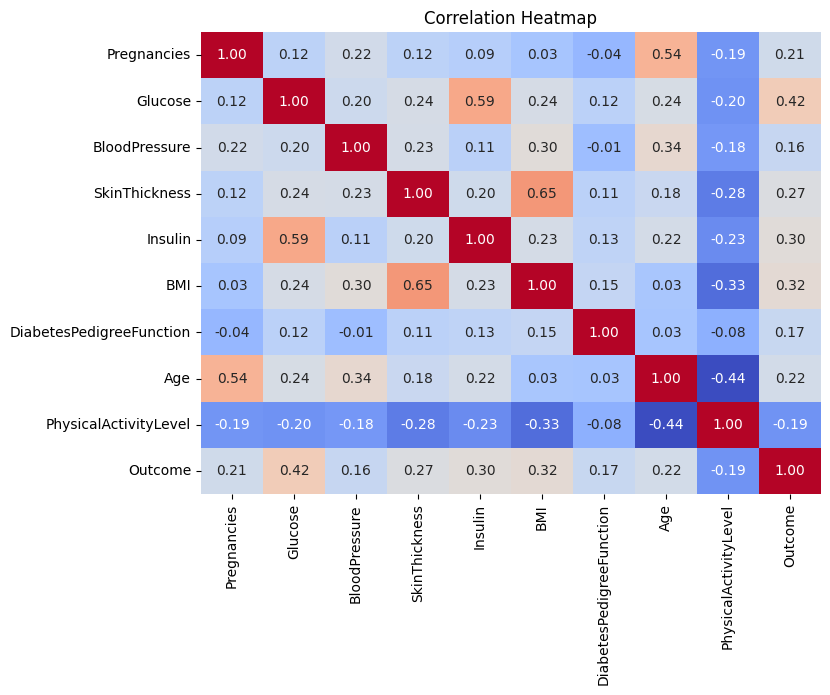

In [69]:
# 2G | Correlation heatmap
plt.figure(figsize=(8,6))
corr = df[num_cols.tolist() + ['Outcome']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# **Interpretation:**
#- Glucose shows the strongest positive correlation with Outcome — likely an important predictor.
#- Pregnancies and Age have mild positive correlation with Outcome.
#- Other variables show weak correlations.


In [70]:
# 2H | Quick bias check
# check class balance within new categorical features
for col in cat_cols:
    display(df.groupby(col)['Outcome'].value_counts(normalize=True).unstack().round(2))


Outcome,0,1
PhysicalActivityLevel,,
1,0.54,0.46
2,0.72,0.28
3,0.88,0.12


Outcome,0,1
FamilyHistory,,
Moderate,0.63,0.37
Strong,0.50,0.50


In [ ]:
# **Observation:**  
# Certain categories in FamilyHistory or PhysicalActivityLevel may have higher diabetes rates, showing potential bias or stronger risk factors.
